## Observations and Insights 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
mouse_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
number_of_mice = len(mouse_study_complete['Mouse ID'].unique())
number_of_mice

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = mouse_study_complete[mouse_study_complete.duplicated(['Mouse ID', 'Timepoint'])]
mice_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_complete[mouse_study_complete['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_complete = mouse_study_complete[mouse_study_complete['Mouse ID'] != 'g989']
mouse_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_2 = len(mouse_study_complete['Mouse ID'].unique())
number_of_mice_2

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_grp = mouse_study_complete.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_ave = drug_grp['Tumor Volume (mm3)'].mean()
tumor_median = drug_grp['Tumor Volume (mm3)'].median()
tumor_variance = drug_grp['Tumor Volume (mm3)'].var()
tumor_std_dev = drug_grp['Tumor Volume (mm3)'].std()
tumor_smpl_err = drug_grp['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_drug_grp_df = pd.DataFrame({'Mean': round(tumor_ave, 2),
                                   'Median': round(tumor_median, 2),
                                   'Variance': round(tumor_variance, 2),
                                   'Standard Deviation': round(tumor_std_dev, 2),
                                   'Sampling Error': round(tumor_smpl_err, 2)
                                   })
summary_drug_grp_df

,Mean,Median,Variance,Standard Deviation,Sampling Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_drug_grp_agg_df = mouse_study_complete[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').agg(
    ['mean', 'median', 'var', 'std', 'sem']).round(2)
summary_drug_grp_agg_df

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

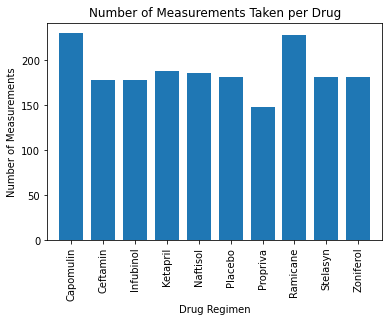

In [29]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
number_of_measurements_per_drug = drug_grp['Mouse ID'].count()

x_axis = np.arange(len(number_of_measurements_per_drug))

number_of_measurements_per_drug.plot(kind = 'bar', width = 0.75, align = 'center')

plt.xlim(-.75, len(x_axis) - .25)
plt.title('Number of Measurements Taken per Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.show()

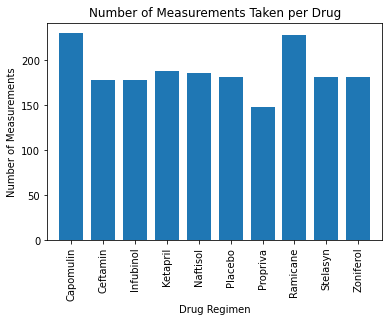

In [49]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(x = x_axis, height = number_of_measurements_per_drug, width = .75, align = "center")

plt.xticks(x_axis, number_of_measurements_per_drug.index, rotation = 90)
plt.xlim(-.75, len(x_axis) - .25)
plt.title('Number of Measurements Taken per Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

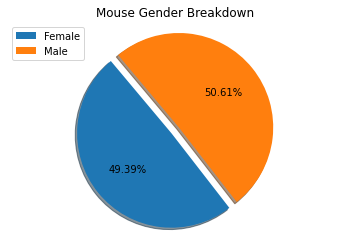

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
number_of_measurements_per_gender = mouse_study_complete[['Sex', 'Mouse ID']].groupby('Sex').count()

number_of_measurements_per_gender.plot(
    kind = 'pie', y = 'Mouse ID', labels = ['', ''], startangle = 130, shadow = True, explode = (.1, 0), autopct = '%.2f%%')

plt.ylabel('')
plt.legend(loc = 'upper left', labels = number_of_measurements_per_gender.index)
plt.title('Mouse Gender Breakdown')
plt.axis('equal')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

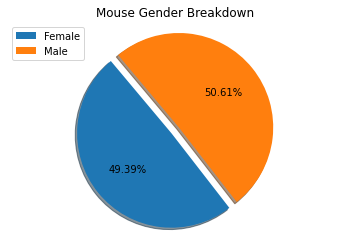

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(number_of_measurements_per_gender['Mouse ID'], labels = ['', ''],
       startangle = 130, shadow = True, explode = (.1, 0), autopct = '%.2f%%')

plt.legend(loc = 'upper left', labels = number_of_measurements_per_gender.index)
plt.title('Mouse Gender Breakdown')
plt.axis('equal')
plt.show


## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_per_mouse = mouse_study_complete[['Mouse ID', 'Timepoint']].groupby('Mouse ID').max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_study_complete_at_max_timepoint = pd.merge(mouse_study_complete, max_timepoint_per_mouse, 
                                                   on = ['Mouse ID', 'Timepoint'])
mouse_study_complete_at_max_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
promising_treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']



# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
